In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import pickle
from pickle import dump, load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_pickle("C:/Users/rubio/Jupyter Notebook/Adecuacion Imagen Texto/Image_Text_Matching_Model/Image_Text_Adequacy_ELMO/df_train_combined.pkl")
df_test = pd.read_pickle("C:/Users/rubio/Jupyter Notebook/Adecuacion Imagen Texto/Image_Text_Matching_Model/Image_Text_Adequacy_ELMO/df_test_combined.pkl")

In [3]:
xtrain, xvalid, ytrain, yvalid = train_test_split(np.array(df_train['combined_input'].values.tolist()), 
                                                  df_train['label'],  
                                                  random_state=42, 
                                                  test_size=0.2)
validation_data = (xvalid,yvalid)

xtest, ytest = df_test['combined_input'],df_test['label']
xtest = np.array(xtest.tolist())
ytest = np.array(ytest.tolist())

# LOGISTIC REGRESSION MODEL

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Training the model
# lreg = LogisticRegression(max_iter=300)
# lreg.fit(xtrain, ytrain)

# save the model to disk
# filename = 'logistic_regression.sav'
# pickle.dump(lreg, open(filename, 'wb'))

C:\Users\rubio\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
# load the model from disk
lreg = pickle.load(open(filename, 'rb'))

In [6]:
preds_valid = lreg.predict(xvalid)

In [7]:
print("Score: " + str(f1_score(yvalid, preds_valid)))

Score: 0.7530474040632053


In [8]:
preds_test = lreg.predict(np.array(df_test['combined_input'].values.tolist()))

# prepare submission dataframe
sub = pd.DataFrame({'id':df_test['id'], 'label':preds_test})

# write predictions to a CSV file
sub.to_csv("sub_lreg.csv", index=False)

In [12]:
print("Groundtruth del dataset:")
sub['label'].value_counts(normalize = True)

Groundtruth del dataset:


0    0.807
1    0.193
Name: label, dtype: float64

In [13]:
print("Nº de etiquetas de cada clase obtenidas con el modelo entrenado:")
combined_negative = df_test[df_test['label']==1]['combined_input']
out = lreg.predict(np.array(combined_negative.values.tolist()))
unique, counts = np.unique(out, return_counts=True)
dict(zip(unique, counts))

Nº de etiquetas de cada clase obtenidas con el modelo entrenado:


{0: 758, 1: 242}

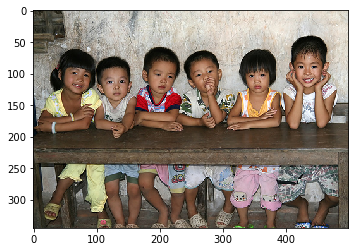

Image description:   rock climber practices on rock climbing wall 
Image id:  979383193_0a542a059d
Prediction:  1


In [11]:
id = 4999
img_path = "E:/TFM/Flickr8k/Images/" + df_test['image_id'][id] + ".jpg"
image = plt.imread(img_path)
plt.imshow(image)
plt.show()
print("Image description: ", df_test['desc'][id], "\nImage id: ",df_test['image_id'][id])
c_i = np.asarray([df_test['combined_input'][id]])
print("Prediction: ", lreg.predict(c_i)[0])